<a href="https://colab.research.google.com/github/xing-wang-kai/SKLEARN_ML_MODELOS_KNN_BNB_DCT/blob/main/Testes_de_modelos_de_Classificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learn

### Classifiações

Testando 3 modelos de classificação para interpretar os dados e tentar executar decisões.

* __K - Neighbors Classifier__ : Modelo de classificação que usa caracteristica de dados próximos com similiaridades nas informações.
* __Bernoull de Naive Bayers__ : Modelo que usa calculos matemticos de probabilidade para torma decisões com base em resultados obtidos.
* __Decision Tree__: modelo que ramifica os dados e desenvolve critérios para afunilizar os padrões e desenvolver resultados.


Os dados trabalhados para esse projeto serão dados realacionados a empresa de TELECOM que possui diversos serviços e valores de assinatura, os dados contém informações de cliente e tem como objetivo descobrir o Churn do cliente com base em cliente que não contiuaram como clientes qual seria a probabilidade de um novo cliente continuar sendo um cliente?


1. Importações de dados

In [145]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv"

dados = pd.read_csv(url)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Ajustar dados

Dados precisam ser ajustados em valores binários ou int ou floats para trabalho da ML

In [146]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

### CARACTERIZAR OS DADOS

Verifcado qual as caracterista em comum de cada dados em cada coluna para poder validar quais são dados binários e quais dados podem ser trabalhados com Dummies.

In [147]:
for cols in dados.columns:
  print("-"*100)
  print(f"|--Coluna: {cols}")
  print(dados[cols].unique())
  print("|" + "-"*80 + "|")

----------------------------------------------------------------------------------------------------
|--Coluna: Maior65Anos
[0 1]
|--------------------------------------------------------------------------------|
----------------------------------------------------------------------------------------------------
|--Coluna: Conjuge
['Sim' 'Nao']
|--------------------------------------------------------------------------------|
----------------------------------------------------------------------------------------------------
|--Coluna: Dependentes
['Nao' 'Sim']
|--------------------------------------------------------------------------------|
----------------------------------------------------------------------------------------------------
|--Coluna: MesesDeContrato
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 3

#### SUBSTITUIR DADOS.
##### SUBSTITUIR DADOS BINÁRIOS

Usar a colunas que podem ser binárias para substituir os dados e assim em vez de retornos não binários com strings de 'sim' e 'não' trocar por dados binários como 0 para não e 1 para sim.

In [148]:
swap_values = {
    'Nao': 0,
    'Sim': 1
}
columns_array = ['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']

"""for cols in columns_array:
  dados[cols] = dados[cols].map(swap_values)

dados.head()"""

dados_modificados = dados[columns_array].replace(swap_values)

dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [149]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

##### DADOS DUMMIES

Dados que tem mais de 2 resposta em retorno dentro da coluna serão separados em critérios de Dummies onde serão criado novas colunas para cada critério e colocado para 0 se o critério não atribui e 1 se o critério está presente.

In [150]:
coluns_for_dummis = ['VariasLinhasTelefonicas',
                     'ServicoDeInternet',
                     'SegurancaOnline',
                     'BackupOnline',
                     'SeguroNoDispositivo',
                     'SuporteTecnico',
                     'TVaCabo',
                     'StreamingDeFilmes',
                     'TipoDeContrato',
                     'FormaDePagamento']

dados_dummies = pd.get_dummies(dados.drop(columns_array, axis=1))
dados_dummies.head()

dados_finais = pd.concat([dados_modificados, dados_dummies], axis=1)
dados_finais.head()


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [151]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

###### AJUSTAR COLUNAS

Ajustado as colunas para retornar todos dados sem resumir pelo Pandas.

In [152]:
pd.set_option('display.max_columns', 39)

In [153]:
x = dados_finais.drop('Churn', axis=1)
y = dados_finais['Churn']

In [154]:
x.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [155]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### REESCALAR

Uma vez devidoa dencidade dos dados que serão trabalhados, eles precisam ser reescalados para que possam ser visualizados, dessa maneira será realizado o reenscalamento dos dados com a fucntion StandardScaler do Sklearn para trabalha com dados reescalonados.

In [156]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,
                                                          random_state=SEED,
                                                          test_size=0.25,
                                                          stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

print(f'{len(train_x)} - {len(test_x)} ')


5282 - 1761 


## MODELO DE K - NEIGHBORS

Este modelo classifica os dados conforme a uniformidade e comparações entre dados próximos de outros vizinhos, assim criando realação e decidindo em qual parametro os dados melhor se encaixam dentro de uam solução.

In [157]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(train_x, train_y)
predict_KNN = KNN.predict(test_x)
predict_KNN

array([1, 0, 0, ..., 0, 0, 0])

In [158]:
from sklearn.metrics import accuracy_score

accuracy_KNN = (accuracy_score(test_y, predict_KNN)*100).round(2)

print(f'A taxa de accuracy_KNN é de {accuracy_KNN} (%)')

A taxa de accuracy_KNN é de 75.58 (%)


## MODELO DE Bernoull de Naive Bayers

Este modelo trabalha com diversos calculos matemáticos sobre os dados, validado todas opções e gerando probabilidades matemáticas para entendimento dos dados e seu retorno, é um modelo de probabilidades.

In [159]:
from sklearn.naive_bayes import BernoulliNB

#Binarize ajusta valors não binários conforme algum critério.
#Como no caso abaixo usamos a médiana entre os valores de X não binários

media = np.median(train_x)
print(f'a média é {media}')
bnb = BernoulliNB(binarize=0.42)
bnb.fit(train_x, train_y)
predict_BNB = bnb.predict(test_x)
predict_BNB


a média é -0.5255032448086513


array([1, 0, 0, ..., 0, 0, 0])

In [160]:
accuracy_BNB = (accuracy_score(test_y, predict_BNB)*100).round(2)

print(f'A taxa de accuracy_BNB é de {accuracy_BNB} (%)')

A taxa de accuracy_BNB é de 71.55 (%)


## MODELO DECISION TREE

Modelo que usa uma árvore de decisões, onde atravez dos dados mais importantes decide a probabilidade de ocorrer o esperado. categorizando os dados de forma hierarquica até alcançar o resultado esperado.



In [161]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',
                             random_state=SEED,
                             max_depth=4)
dtc.fit(train_x, train_y)
predict_dtc = dtc.predict(test_x)
predict_dtc


array([1, 0, 0, ..., 0, 0, 0])

In [162]:
accuracy_DTC = (accuracy_score(test_y, predict_dtc)*100).round(2)

print(f'A taxa de accuracy_DTC é de {accuracy_DTC} (%)')

A taxa de accuracy_DTC é de 78.36 (%)


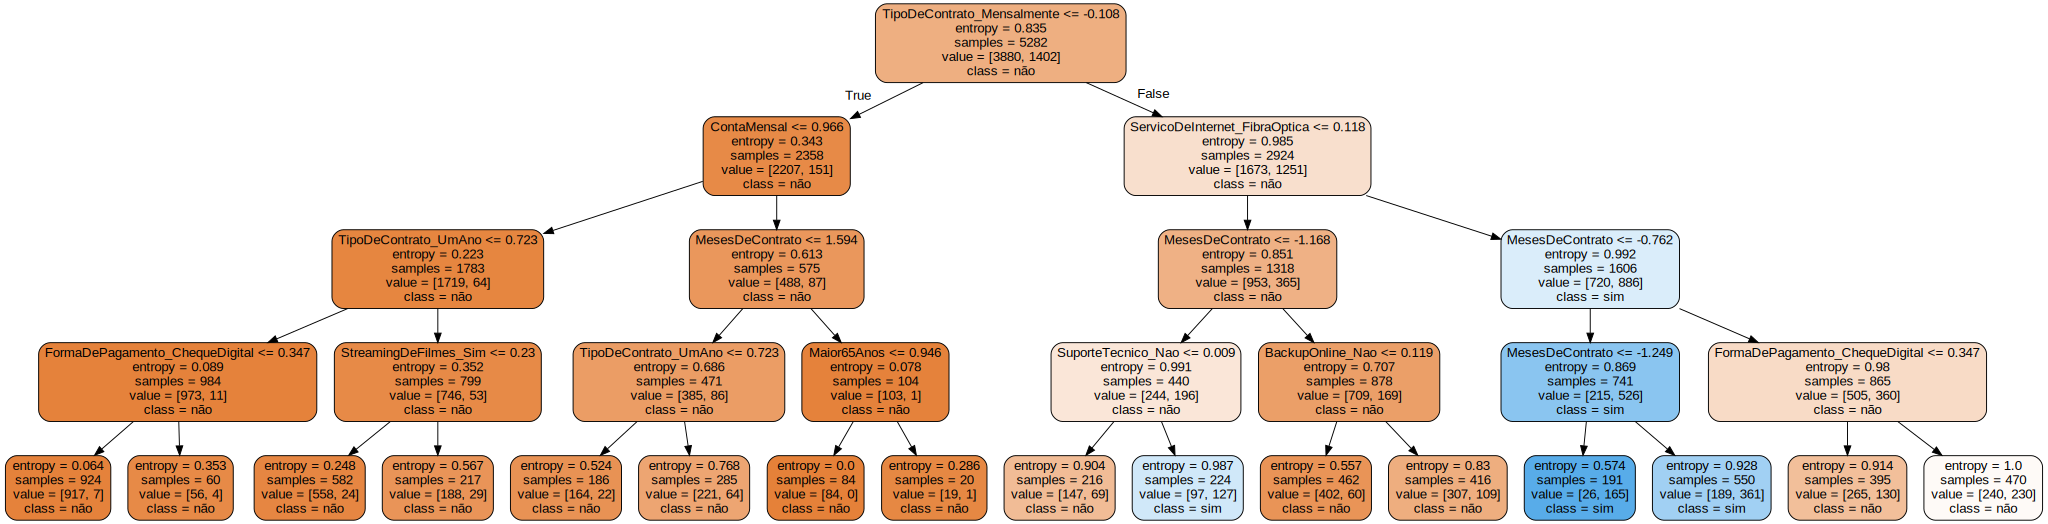

In [163]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dtc, out_file=None,
    class_names = ['não', 'sim'],
    feature_names =x.columns,
    filled=True,
    rounded=True,
)

grafico = graphviz.Source(dot_data)

grafico

In [164]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00189715,
       0.16760568, 0.04650537, 0.        , 0.        , 0.        ,
       0.        , 0.12949224, 0.        , 0.        , 0.        ,
       0.        , 0.01407556, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01568188, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01095532, 0.        , 0.56738232, 0.02826874, 0.        ,
       0.01813574, 0.        , 0.        ])

## COMPARAR OS RESULTADOS.

Usando a Accuracy é comparado a taxa de acerto dos dados com seus retornos respectivos apra valdiar qual tem a maior taixa de acerto e melhor retorno de resultados.

### ACURACIA

TP + TN / ( TP + TN + FP + FN )


In [165]:
print(f'A taxa de accuracy_KNN é de {accuracy_KNN} (%)')
print(f'A taxa de accuracy_BNB é de {accuracy_BNB} (%)')
print(f'A taxa de accuracy_DTC é de {accuracy_DTC} (%)')

A taxa de accuracy_KNN é de 75.58 (%)
A taxa de accuracy_BNB é de 71.55 (%)
A taxa de accuracy_DTC é de 78.36 (%)


## MATRIX DE CONFUSÃO

Usando matrizes e confusões para validar os dados.

* __VP__ : Verdadeiro positivo
* __FP__ : Falso Positivo
* __VN__ : Verdadeiro Negativo
* __FN__ : Falso Negativo

<div style={font-size:30px}>

|  | sim | não|
|---|----|----|
| sim | <h2 font:60px >VP</h2> |  <h2 font:60px > FN </h2> |
| não | <h2 font:60px > FP </h2> |   <h2 font:60px > VN </h2> |

</div>





In [166]:

from sklearn.metrics import confusion_matrix
sim_nao = ['sim', 'não']
matrix_KNN = pd.DataFrame(data=confusion_matrix(test_y, predict_KNN), columns=sim_nao, index=sim_nao)
matrix_KNN


,sim,não
sim,1091,203
não,227,240


In [167]:
matrix_BNB = pd.DataFrame(data=confusion_matrix(test_y, predict_BNB), columns=sim_nao, index=sim_nao)
matrix_BNB

,sim,não
sim,886,408
não,93,374


In [168]:
matrix_DTC = pd.DataFrame(data=confusion_matrix(test_y, predict_dtc), columns=sim_nao, index=sim_nao)
matrix_DTC

,sim,não
sim,1188,106
não,275,192


## MÉTRICA DE PRECISÃO

TP / ( TP + FP )


In [170]:
from sklearn.metrics import precision_score

precision_KNN = (precision_score(test_y, predict_KNN)*100).round(2)
precision_BNB = (precision_score(test_y, predict_BNB)*100).round(2)
precision_DTC = (precision_score(test_y, predict_dtc)*100).round(2)

print(f'O metrica de precisão para KNN foi de {precision_KNN} (%)')
print(f'O metrica de precisão para BNB foi de {precision_BNB} (%)')
print(f'O metrica de precisão para DTC foi de {precision_DTC} (%)')

O metrica de precisão para KNN foi de 54.18 (%)
O metrica de precisão para BNB foi de 47.83 (%)
O metrica de precisão para DTC foi de 64.43 (%)


## RECALL

Mede somente os valores positivos de uma formulá

### RC = VP / ( VP + FP )

In [171]:
from sklearn.metrics import recall_score

recall_KNN = (recall_score(test_y, predict_KNN)*100).round(2)
recall_BNB = (recall_score(test_y, predict_BNB)*100).round(2)
recall_DTC = (recall_score(test_y, predict_dtc)*100).round(2)

print(f'O metrica de recall para KNN foi de {recall_KNN} (%)')
print(f'O metrica de recall para BNB foi de {recall_BNB} (%)')
print(f'O metrica de recall para DTC foi de {recall_DTC} (%)')

O metrica de recall para KNN foi de 51.39 (%)
O metrica de recall para BNB foi de 80.09 (%)
O metrica de recall para DTC foi de 41.11 (%)
